In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
df = pd.read_csv("dataset.csv")

In [262]:
df

,qty_dot_url,qty_slash_url,qty_tld_url,length_url,qty_dot_domain,qty_vowels_domain,domain_length,directory_length,file_length,params_length,...,ttl_hostname,domain_spf,url_shortened,domain_google_index,url_google_index,tls_ssl_certificate,domain_in_ip,server_client_domain,email_in_url,phishing
0,3,1,1,25,2,4,17,8,7,-1,...,892,0,0,0,0,0,0,0,0,1
1,5,3,3,223,2,5,16,42,9,165,...,9540,-1,0,0,0,1,0,0,0,1
2,2,1,1,15,2,3,14,1,0,-1,...,589,0,0,0,0,1,0,0,0,0
3,4,5,1,81,2,7,19,62,9,-1,...,292,0,0,0,0,1,0,0,0,1
4,2,0,1,19,2,5,19,-1,-1,-1,...,3597,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,0,2,23,3,5,23,-1,-1,-1,...,3597,0,0,0,0,0,0,0,0,0
88643,2,0,1,34,2,14,34,-1,-1,-1,...,591,0,0,0,0,0,0,0,0,0
88644,2,5,1,70,1,6,22,48,11,-1,...,14391,0,0,0,0,1,0,0,0,1
88645,2,1,1,28,2,5,27,1,0,-1,...,52,0,0,0,0,1,0,0,0,1


["qty_dot_url","qty_slash_url","qty_tld_url","length_url","qty_dot_domain","qty_vowels_domain","domain_length",
 "directory_length","file_length","params_length","time_response","asn_ip","time_domain_activation","time_domain_expiration",
 "qty_nameservers","qty_mx_servers","ttl_hostname"]]


### Handiling Missing Value
in some columns there is -1 value this represent null value. so we have to try 

In [263]:
# first try to find which columns has -1 value
df_null = df.iloc[:,[~(df[col] > -1).all() for col in df.columns]]

In [264]:
df_null

,directory_length,file_length,params_length,time_response,asn_ip,time_domain_activation,time_domain_expiration,ttl_hostname,domain_spf,domain_google_index,url_google_index
0,8,7,-1,0.207316,60781,-1,-1,892,0,0,0
1,42,9,165,0.499566,36024,579,150,9540,-1,0,0
2,1,0,-1,0.935901,4766,-1,-1,589,0,0,0
3,62,9,-1,0.410021,20454,-1,-1,292,0,0,0
4,-1,-1,-1,0.410761,53831,6998,306,3597,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
88642,-1,-1,-1,0.135186,8560,5509,334,3597,0,0,0
88643,-1,-1,-1,0.397981,26496,5046,431,591,0,0,0
88644,48,11,-1,0.745030,394695,1844,712,14391,0,0,0
88645,1,0,-1,0.307057,47583,-1,-1,52,0,0,0


In [265]:
df.domain_spf.value_counts()

 0    60882
-1    14677
 1    13088
Name: domain_spf, dtype: int64

In [266]:
# first wee need to convert -1 into null value
df_null = df_null.replace(-1, np.nan)


In [267]:
df_null.isnull().sum()

directory_length          47509
file_length               47509
params_length             81225
time_response              5860
asn_ip                     6473
time_domain_activation    24354
time_domain_expiration    26210
ttl_hostname               4454
domain_spf                14677
domain_google_index          88
url_google_index             90
dtype: int64

11 columns having null values

In [268]:
# now we need to find how many percentage of null values are there in each columns
def find_null_per(df):
    for i in df:
        print(f"{df[i].isnull().sum()/88647*100}% '{i}' column is having  null values")
  

In [269]:
find_null_per(df_null)

53.59346621995105% 'directory_length' column is having  null values
53.59346621995105% 'file_length' column is having  null values
91.62746624251244% 'params_length' column is having  null values
6.610488792626936% 'time_response' column is having  null values
7.3019955554051466% 'asn_ip' column is having  null values
27.473010930995972% 'time_domain_activation' column is having  null values
29.566708405247784% 'time_domain_expiration' column is having  null values
5.0244227103004055% 'ttl_hostname' column is having  null values
16.556679865082856% 'domain_spf' column is having  null values
0.09927013886538744% 'domain_google_index' column is having  null values
0.10152627838505533% 'url_google_index' column is having  null values


after finding null value percentage only params_length is having 91% null values so we should delete this column<br>
one intersting fact is 'directory_length' & 'file_length' is having same percentage of missing value

In [270]:
# delete params_length columns
df = df.drop('params_length', axis=1)

In [271]:
df_null = df_null.drop('params_length', axis=1)

In [272]:
df_null

,directory_length,file_length,time_response,asn_ip,time_domain_activation,time_domain_expiration,ttl_hostname,domain_spf,domain_google_index,url_google_index
0,8.0,7.0,0.207316,60781.0,NaN,NaN,892.0,0.0,0.0,0.0
1,42.0,9.0,0.499566,36024.0,579.0,150.0,9540.0,NaN,0.0,0.0
2,1.0,0.0,0.935901,4766.0,NaN,NaN,589.0,0.0,0.0,0.0
3,62.0,9.0,0.410021,20454.0,NaN,NaN,292.0,0.0,0.0,0.0
4,NaN,NaN,0.410761,53831.0,6998.0,306.0,3597.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
88642,NaN,NaN,0.135186,8560.0,5509.0,334.0,3597.0,0.0,0.0,0.0
88643,NaN,NaN,0.397981,26496.0,5046.0,431.0,591.0,0.0,0.0,0.0
88644,48.0,11.0,0.745030,394695.0,1844.0,712.0,14391.0,0.0,0.0,0.0
88645,1.0,0.0,0.307057,47583.0,NaN,NaN,52.0,0.0,0.0,0.0


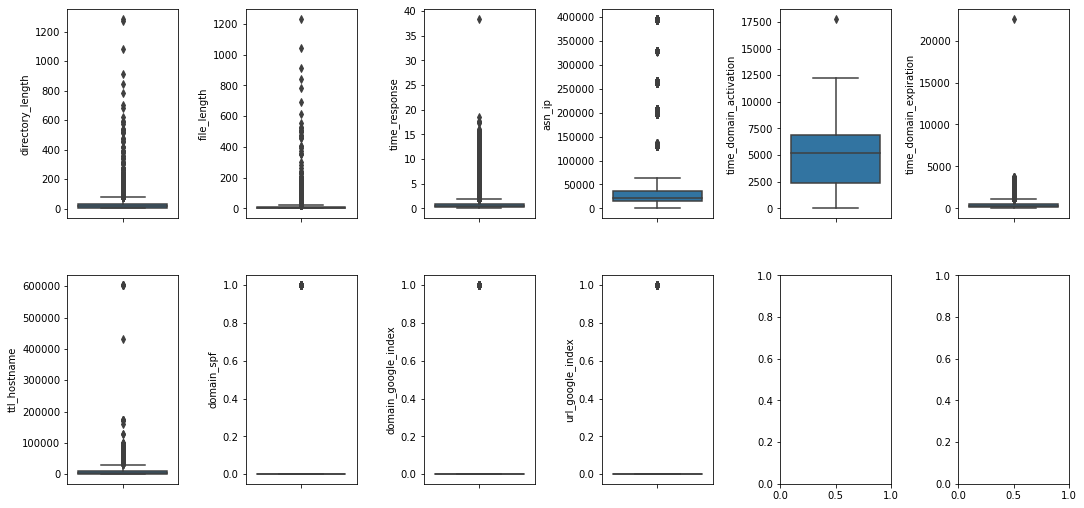

In [273]:
#checking outlier using boxplot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,7))
index = 0
ax = ax.flatten()

for col, value in df_null.items():
    sns.boxplot(y=col, data=df_null, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

there are many ways to handle outliers. most comman is mean or median<br>
in our dataset there are outliers. so in case of handling missing value with outlier 'median' is more effective compare to mean 

In [274]:
# fill missing values with median
df = df.replace(-1, np.nan)
df = df.fillna(df.median())

In [275]:
df.isnull().sum()

qty_dot_url               0
qty_slash_url             0
qty_tld_url               0
length_url                0
qty_dot_domain            0
qty_vowels_domain         0
domain_length             0
directory_length          0
file_length               0
time_response             0
asn_ip                    0
time_domain_activation    0
time_domain_expiration    0
qty_nameservers           0
qty_mx_servers            0
ttl_hostname              0
domain_spf                0
url_shortened             0
domain_google_index       0
url_google_index          0
tls_ssl_certificate       0
domain_in_ip              0
server_client_domain      0
email_in_url              0
phishing                  0
dtype: int64

We have successfully handled missing value

### Imbalanced Data Handling

In [276]:
df.phishing.value_counts()

0    58000
1    30647
Name: phishing, dtype: int64

in target column 0 has 58k value and 1 has 30k value. it's almost 50% 50% ratio so we nned to OverSample dataset to avoid low accuracy

<AxesSubplot:xlabel='phishing', ylabel='count'>

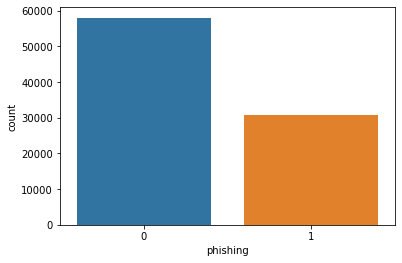

In [277]:
sns.countplot(x="phishing", data=df)

In [278]:
from imblearn.over_sampling import SMOTE

In [279]:
from sklearn.model_selection import train_test_split

In [280]:
sm = SMOTE(random_state = 42)

In [140]:
df_new, df_phishing_new = sm.fit_resample(df.drop('phishing', axis=1), df.phishing)

C:\Users\MihirDholakia\AppData\Local\Temp\ipykernel_7468\1090611896.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df, df.phishing = sm.fit_resample(df.drop('phishing', axis=1), df.phishing)


In [176]:
def over_sample(df, df_phishing):
    df_new, df_phishing_new = sm.fit_resample(df.drop('phishing', axis=1), df_phishing)
    df_new['phishing'] = df_phishing_new
    return df_new

In [177]:
over_sample(df, df.phishing)

,qty_dot_url,qty_slash_url,qty_tld_url,length_url,qty_dot_domain,qty_vowels_domain,domain_length,directory_length,file_length,time_response,...,ttl_hostname,domain_spf,url_shortened,domain_google_index,url_google_index,tls_ssl_certificate,domain_in_ip,server_client_domain,email_in_url,phishing
0,3,1,1,25,2,4,17,8.000000,7.000000,0.207316,...,892.000000,0.0,0,0.0,0.0,0,0,0,0,1
1,5,3,3,223,2,5,16,42.000000,9.000000,0.499566,...,9540.000000,0.0,0,0.0,0.0,1,0,0,0,1
2,2,1,1,15,2,3,14,1.000000,0.000000,0.935901,...,589.000000,0.0,0,0.0,0.0,1,0,0,0,0
3,4,5,1,81,2,7,19,62.000000,9.000000,0.410021,...,292.000000,0.0,0,0.0,0.0,1,0,0,0,1
4,2,0,1,19,2,5,19,18.000000,3.000000,0.410761,...,3597.000000,0.0,0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115995,2,3,1,32,1,5,15,17.064722,5.920425,0.267266,...,14392.000000,0.0,0,0.0,0.0,0,0,0,0,1
115996,3,1,1,139,2,5,20,1.000000,0.000000,0.274708,...,48.530815,0.0,0,0.0,0.0,0,0,0,0,1
115997,1,1,1,22,1,3,18,2.393763,0.000000,0.263664,...,596.356725,0.0,0,0.0,0.0,1,0,0,0,1
115998,2,3,1,125,2,2,12,55.533534,5.927928,0.217090,...,392.892898,0.0,0,0.0,0.0,0,0,0,0,1


In [281]:
df_new, df_phishing_new = sm.fit_resample(df.drop('phishing', axis=1), df.phishing)

In [282]:
df_new['phishing'] = df_phishing_new

In [283]:
df_new

,qty_dot_url,qty_slash_url,qty_tld_url,length_url,qty_dot_domain,qty_vowels_domain,domain_length,directory_length,file_length,time_response,...,ttl_hostname,domain_spf,url_shortened,domain_google_index,url_google_index,tls_ssl_certificate,domain_in_ip,server_client_domain,email_in_url,phishing
0,3,1,1,25,2,4,17,8.000000,7.000000,0.207316,...,892.000000,0.0,0,0.0,0.0,0,0,0,0,1
1,5,3,3,223,2,5,16,42.000000,9.000000,0.499566,...,9540.000000,0.0,0,0.0,0.0,1,0,0,0,1
2,2,1,1,15,2,3,14,1.000000,0.000000,0.935901,...,589.000000,0.0,0,0.0,0.0,1,0,0,0,0
3,4,5,1,81,2,7,19,62.000000,9.000000,0.410021,...,292.000000,0.0,0,0.0,0.0,1,0,0,0,1
4,2,0,1,19,2,5,19,18.000000,3.000000,0.410761,...,3597.000000,0.0,0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115995,2,3,1,32,1,5,15,17.064722,5.920425,0.267266,...,14392.000000,0.0,0,0.0,0.0,0,0,0,0,1
115996,3,1,1,139,2,5,20,1.000000,0.000000,0.274708,...,48.530815,0.0,0,0.0,0.0,0,0,0,0,1
115997,1,1,1,22,1,3,18,2.393763,0.000000,0.263664,...,596.356725,0.0,0,0.0,0.0,1,0,0,0,1
115998,2,3,1,125,2,2,12,55.533534,5.927928,0.217090,...,392.892898,0.0,0,0.0,0.0,0,0,0,0,1


Now we have done Over Sampling

### Scaling Data

In [284]:
from sklearn.preprocessing import StandardScaler

In [285]:
scaler = StandardScaler()

In [286]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_new.drop('phishing', axis=1)),columns = df.columns[:-1])

In [287]:
df_scaled

,qty_dot_url,qty_slash_url,qty_tld_url,length_url,qty_dot_domain,qty_vowels_domain,domain_length,directory_length,file_length,time_response,...,qty_mx_servers,ttl_hostname,domain_spf,url_shortened,domain_google_index,url_google_index,tls_ssl_certificate,domain_in_ip,server_client_domain,email_in_url
0,0.604684,-0.327011,-0.188299,-0.352067,0.307714,-0.569561,-0.219539,-0.638844,0.102892,-0.501410,...,-1.002208,-0.513851,-0.444442,-0.084738,-0.053507,-0.045028,-0.949793,-0.051429,-0.061423,-0.144171
1,2.110311,0.681103,7.359288,3.574228,0.307714,-0.182313,-0.364320,0.822929,0.238916,-0.288777,...,-0.402331,0.313968,-0.444442,-0.084738,-0.053507,-0.045028,1.052861,-0.051429,-0.061423,-0.144171
2,-0.148129,-0.327011,-0.188299,-0.550365,0.307714,-0.956808,-0.653882,-0.939797,-0.373195,0.028689,...,0.797423,-0.542855,-0.444442,-0.084738,-0.053507,-0.045028,1.052861,-0.051429,-0.061423,-0.144171
3,1.357498,1.689216,-0.188299,0.758400,0.307714,0.592181,0.070023,1.682795,0.238916,-0.353927,...,-1.002208,-0.571285,-0.444442,-0.084738,-0.053507,-0.045028,1.052861,-0.051429,-0.061423,-0.144171
4,-0.148129,-0.831068,-0.188299,-0.471045,0.307714,-0.182313,0.070023,-0.208911,-0.169158,-0.353389,...,-0.402331,-0.254918,-0.444442,-0.084738,-0.053507,-0.045028,-0.949793,-0.051429,-0.061423,-0.144171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115995,-0.148129,0.681103,-0.188299,-0.213258,-1.064846,-0.182313,-0.509101,-0.249121,0.029467,-0.457792,...,0.797423,0.778419,-0.444442,-0.084738,-0.053507,-0.045028,-0.949793,-0.051429,-0.061423,-0.144171
115996,0.604684,-0.327011,-0.188299,1.908527,0.307714,-0.182313,0.214804,-0.939797,-0.373195,-0.452377,...,-1.002208,-0.594591,-0.444442,-0.084738,-0.053507,-0.045028,-0.949793,-0.051429,-0.061423,-0.144171
115997,-0.900942,-0.327011,-0.188299,-0.411556,-1.064846,-0.956808,-0.074758,-0.879874,-0.373195,-0.460412,...,0.197546,-0.542151,-0.444442,-0.084738,-0.053507,-0.045028,1.052861,-0.051429,-0.061423,-0.144171
115998,-0.148129,0.681103,-0.188299,1.630910,0.307714,-1.344055,-0.943445,1.404780,0.029978,-0.494298,...,0.197546,-0.561627,-0.444442,-0.084738,-0.053507,-0.045028,-0.949793,-0.051429,-0.061423,-0.144171


In [307]:
df_scaled['phishing'] = df_new.phishing

In [308]:
df_scaled

,qty_dot_url,qty_slash_url,qty_tld_url,length_url,qty_dot_domain,qty_vowels_domain,domain_length,directory_length,file_length,time_response,...,ttl_hostname,domain_spf,url_shortened,domain_google_index,url_google_index,tls_ssl_certificate,domain_in_ip,server_client_domain,email_in_url,phishing
0,0.604684,-0.327011,-0.188299,-0.352067,0.307714,-0.569561,-0.219539,-0.638844,0.102892,-0.501410,...,-0.513851,-0.444442,-0.084738,-0.053507,-0.045028,-0.949793,-0.051429,-0.061423,-0.144171,1
1,2.110311,0.681103,7.359288,3.574228,0.307714,-0.182313,-0.364320,0.822929,0.238916,-0.288777,...,0.313968,-0.444442,-0.084738,-0.053507,-0.045028,1.052861,-0.051429,-0.061423,-0.144171,1
2,-0.148129,-0.327011,-0.188299,-0.550365,0.307714,-0.956808,-0.653882,-0.939797,-0.373195,0.028689,...,-0.542855,-0.444442,-0.084738,-0.053507,-0.045028,1.052861,-0.051429,-0.061423,-0.144171,0
3,1.357498,1.689216,-0.188299,0.758400,0.307714,0.592181,0.070023,1.682795,0.238916,-0.353927,...,-0.571285,-0.444442,-0.084738,-0.053507,-0.045028,1.052861,-0.051429,-0.061423,-0.144171,1
4,-0.148129,-0.831068,-0.188299,-0.471045,0.307714,-0.182313,0.070023,-0.208911,-0.169158,-0.353389,...,-0.254918,-0.444442,-0.084738,-0.053507,-0.045028,-0.949793,-0.051429,-0.061423,-0.144171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115995,-0.148129,0.681103,-0.188299,-0.213258,-1.064846,-0.182313,-0.509101,-0.249121,0.029467,-0.457792,...,0.778419,-0.444442,-0.084738,-0.053507,-0.045028,-0.949793,-0.051429,-0.061423,-0.144171,1
115996,0.604684,-0.327011,-0.188299,1.908527,0.307714,-0.182313,0.214804,-0.939797,-0.373195,-0.452377,...,-0.594591,-0.444442,-0.084738,-0.053507,-0.045028,-0.949793,-0.051429,-0.061423,-0.144171,1
115997,-0.900942,-0.327011,-0.188299,-0.411556,-1.064846,-0.956808,-0.074758,-0.879874,-0.373195,-0.460412,...,-0.542151,-0.444442,-0.084738,-0.053507,-0.045028,1.052861,-0.051429,-0.061423,-0.144171,1
115998,-0.148129,0.681103,-0.188299,1.630910,0.307714,-1.344055,-0.943445,1.404780,0.029978,-0.494298,...,-0.561627,-0.444442,-0.084738,-0.053507,-0.045028,-0.949793,-0.051429,-0.061423,-0.144171,1


In [309]:
df_scaled.to_csv("final_scaled_csv", index=False)